 100本ノック 第4章 形態素解析

問３０

In [12]:
#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install unidic-lite

#neko.txtをインストール
!wget https://nlp100.github.io/data/neko.txt

#形態素解析
!mecab ./neko.txt -o ./neko.txt.mecab
#macab {入力ファイルのパス} -o {出力先のバス}

result = []
sentence = []
#空のリストを二つ作成する
path = 'neko.txt.mecab'
with open(path) as f:
  for line in f:
    l1 = line.split("\t") #タブを区切りとして1行ずつ読み込む
    if len(l1) == 2: #要素が二つであれば、一つ目と二つ目をカンマで区切る
      #print(line)
      l2 = l1[1].split(",")
      sentence.append({"surface": l1[0], "base": l2[6], "pos": l2[0], "pos1": l2[1]})
      if l2[1] == "句点": #句点が来たときにsentence内のdictをresultに格納する
        result.append(sentence)
        sentence = []
result

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
--2023-12-01 05:54:46--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.8’

neko.txt.8          100%[===================>] 952.92K  --.-KB/s    in 0.07s   

2023-12-01 05:54:46 (13.8 MB/s) - ‘neko.txt.8’ saved [975789/975789]



[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surfa

メカブの出力フォーマットは形態素の情報が、タブやカンマで区切られていることに注意
句点で区切り、一文を形態素のリストとして表現している。
出力フォーマット↓

表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

問３１

In [3]:
se = set()#セットは重複の格納を行わないための関数

for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞": #品詞を格納しているposが動詞のとき、表層系をセットする
      se.add(dic["surface"])

print(se)

{'叶わ', '打ち抜い', 'はずれ', 'ねばり', '向か', '断っ', '捻る', '振り上げ', '劣っ', '取上げ', '貰う', '選ん', '休み', '案ずる', '降り込ん', '切っ', '正し', '知り', '混ぜ', 'こぼす', '曲っ', '事足る', '復する', '引きずり出し', '食わせ', 'つぶやい', '曲る', 'しから', 'なさい', 'かれ', 'し', '失っ', 'かため', 'ひやかす', '乱す', '充たす', 'におっ', '寝転ん', 'なす', '望ん', '崩す', '返', '飲み下し', '込める', 'どっ', '笑う', '溜っ', 'よごれる', 'ふるえ', '頂い', 'たまり', '張り切れ', '通せ', '考えつい', 'ならん', '有る', '漕ぎ', '釣る', '受け合う', '換え', '見廻', '載っ', '乗', '心得る', '損じ', '据え', '飛び出す', 'もてなす', '落す', 'すてる', '祝う', '略する', '引っかかっ', '弄する', '下がれ', '直し', '信ずる', '懸かり', '問い返さ', '引っ掛け', '見抜い', '抱く', '沸き上がっ', '好か', 'がら', 'ふっ', '折れん', '下がっ', '働い', '見上ぐる', '応じ', '結びつけ', '取り落し', '作り上げ', '病み', '果せる', 'あたら', '攫み', 'つれ', 'きっ', '見せびらかし', '纏まる', '企て', 'でき', '感じる', 'かおっ', '謡わ', '破れる', '受け', 'きる', '障', '平らげ', '吹き払い', '切ろ', '抱え', '期する', 'ひろげる', 'ねだん', '祈ら', 'いたす', 'いら', '解く', 'へい', '持ち上がっ', '釣れる', '嘲り', '極める', '死ぬ', '持ち', '続か', '突っ伏し', '取り留め', 'られれ', '倍し', 'かく', '引張っ', '誓っ', '砕い', '殺す', '聞き分ける', '照らし', '考え付い', 'っ', '追い詰め', '欠け', '曇っ', 'してやる', '呈し', 'はみ

問３２

In [4]:
se = set()

for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      se.add(dic["base"])#問３１の出力部分を動詞から基本形に変更する

print(se)

{'服せる', '比する', '投ずる', '捻る', '貰う', '植え付ける', 'ゆう', '案ずる', 'やらす', 'こぼす', '飲み干す', '復する', '携える', '盛る', '事足る', '沈める', 'ひやかす', '曲る', 'ゆるめる', 'あったまる', '悔やむ', '乱す', '充たす', '察する', '踊る', '倦む', 'なす', '崩す', '笑う', '振り落とす', '突き立てる', 'よごれる', 'あこがれる', '曲げる', '読み直す', 'しらべる', 'どる', '有る', '釣る', '行き過ぎる', '受け合う', 'とおる', 'つれる', '心得る', '飛び出す', 'もてなす', 'せり出す', '振りかける', '落す', '祝う', 'かれる', 'すてる', '略する', 'すく', '転げ落ちる', '弄する', '見くびる', '焦がれる', '信ずる', 'しまる', '抱く', '通り掛る', '申し上げる', '照らす', 'じみる', '果せる', '聞きつける', '纏まる', '感じる', '洗える', '破れる', 'きる', '期する', 'ひろげる', '釣れる', 'いたす', '解く', '拱く', '逆立てる', '極める', '死ぬ', '謡う', 'かく', '殺す', '聞き分ける', '急き込む', 'してやる', '冠する', '取りはずす', '凝らす', '取り立てる', '喚ぶ', 'とく', '移す', '追い廻す', '写る', '塞ぐ', 'くりゃる', '唸る', '取り合う', '磨ける', '気取る', '掛ける', 'ぱちつかせる', '択ぶ', '撰ぶ', '降す', '生き延びる', 'ふる', '嵌める', 'じゃらす', '見届ける', 'とりのける', '関す', '添う', '割る', 'まじなう', 'おこす', '踏む', '企てる', '通す', '被れる', '惹く', '思い返す', '焚く', 'めぐらす', 'きまる', 'つかえる', '取れる', 'ぐれる', '置ける', '終る', '撮る', '隣る', 'ちる', 'はじめる', '富む', 'くずす', '争う', '呑む', '漕ぎつける',

問３３

In [5]:
se = set()

for line in result:
  for i in range(len(line)):
   if line[i]["pos"] == "名詞" and line[i + 1]["surface"] == "の" and line[i + 2]["pos"] == "名詞":
    #名詞があったら場合、その次にのがきて、その次にさらに名詞が来る場合を分岐させている
     se.add(line[i]["surface"] + line[i + 1]["surface"] + line[i + 2]["surface"])
     #名詞句の抽出であるため対応する位置のsurfaceを出力させる
print(se)

{'細君の御意', '餅の角', '階の窓', '竹槍の二', '弾の所在地', '同情の念', 'こないだの事', '何の返事', '無粋の数', '頃の女', '秋の灯', '方のため', '背中の毛', '夢のよう', '明治の昭代', '本当の御馳走', '円の月謝', '日の間', '同様の速度', '空地の向う', '罵詈の言語', '吾輩の御蔭', '足の先生', '垣根の傍', 'やみのよう', '不可思議の太平', 'ところの賞与', '平生の通り', '館の君子', '個人の自覚', 'ベトヴェンのシンフォニー', '婦人の名', '大名のよう', '風の吾', '新体詩の種', '牛の足跡', '人間の間', '他の動物', '外の空地', '自殺の能力', '上の地位', '町の方', '山の芋の好き', '金田の事', 'こっちの姿', '巻煙草の灰', '校長の命', '学校の職員', '上の参考', '唐茄子のよう', '文明の産物', '君の旧友', '猫の爪', '期の後', 'さんの頭', '酒の相手', '納戸の博多', '子の一言', '帰りの刻限', '典の女連', '去年の臭気', '古今の書籍', '不可測の心', '竜頭蛇尾の感', '壺の中', '針箱の横', '体の名筆', '部屋の中', '両君の談話', '事件の前', '迷亭の鋭鋒', '逆上の説明', '御前の学校', '人の身の上', '餅の切れ', '軽侮の口調', '鼠の糞', '連中のうち', '界の語', '崎の親友', '僕の解釈', '自分の廻り', '膏のよう', '天下の秀才', '例の倫理', '蝉の所在地', '前の書生', '門の内', '形の桶', '主人の言動', '列席の化物', '方の考', '文明の未来', '東風の高輪', '吾輩の心眼', '棺の中', '横丁の肴', '灰色の斑', 'ばの顔', '君の眼', '今の糸織', '友愛の敵', 'こっちの便利', '的のもの', '本社の方', '猿の末孫', '枝の上', 'シャツの腕', '小僧の手', '将来の趨勢', '柳の下', '今日の会', '同類のよう', '味噌汁の中', 'コートの伯父', '運動の神聖', '昔の武士', '心の裡', '襖の陰', 

問３４

In [14]:
text_d = {}
text = ""

for line in result:
  for dic in line:
    if dic["pos"] == "名詞":
      text += dic["surface"] #表層系をtext変数に保存
    else:
      text_d[text] = len(text)  #テキストに保存しておいた表層形の長さをlen関数で求め格納

      text = ""  #textをリセットする



print([k for k, v in text_d.items() if v == max(text_d.values())])
print([v for k, v in text_d.items() if v == max(text_d.values())])

["manyaslip'twixtthecupandthelip", 'Archaiomelesidonophrunicherata']
[30, 30]


問３５

In [17]:
from collections import Counter

result = []
sentence = []

with open("neko.txt.mecab") as f:
  for line in f:
    l1 = line.split("\t")
    if len(l1) == 2:
      l2 = l1[1].split(",")
      sentence.append({"surface": l1[0], "base": l2[6], "pos": l2[0], "pos1": l2[1]})
      if l2[1] == "句点":
        result.append(sentence)
        sentence = []
#ここまでは問３０と同じ

text_l = []

for lis in result:
  for dic in lis:
    if dic["pos"] != "記号":   #表層形が記号の場合を除く
      text_l.append(dic["surface"])

c35 = Counter(text_l)   #引数にリストやタプルを受け取り、キーに要素、値に出現回数という形のデータを持つよう定義してくれる関数
print(c35.most_common())  #単語の出力数が多い順に並べて出力してくれる関数

[('の', 9194), ('て', 6868), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('これ', 414), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), ('だろ', 270), ('くらい', 269), ('僕', 268), ('たら', 262), ('さん', 260), ('なく', 258), ('

問３６

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a27ad1d81dd1b88b8edd1cab2987815df39a19c984b19ce17a6d2df49fdfeae8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


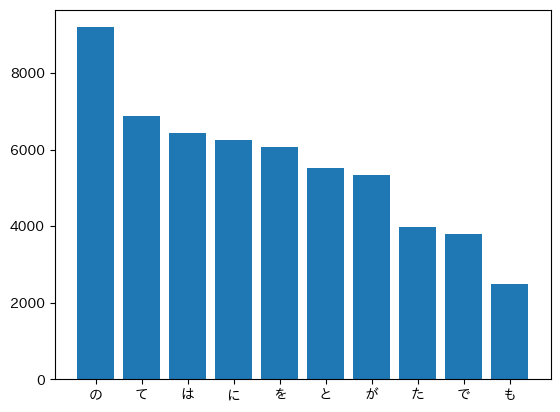

In [18]:
!pip install japanize-matplotlib

#matplotlibで日本語表示させるためのモジュール

import matplotlib.pyplot as plt
import japanize_matplotlib

#count
c36 = Counter(text_l)
word, count = zip(*c36.most_common(10))  #要素をアンパックする
#アンパックとはタプルに格納されている要素の一つ一つを別々の変数に代入すること
#タプルとは複数の構成要素からなる組を総称する一般概念
 #引数は出現回数の多いn個分の要素を出力する

#plot
fig, ax = plt.subplots()
ax.bar(word, count)  #Ｘ軸に単語、Ｙ軸に出現回数を指定して棒グラフで表示
plt.show()  #グラフを表示

問３７

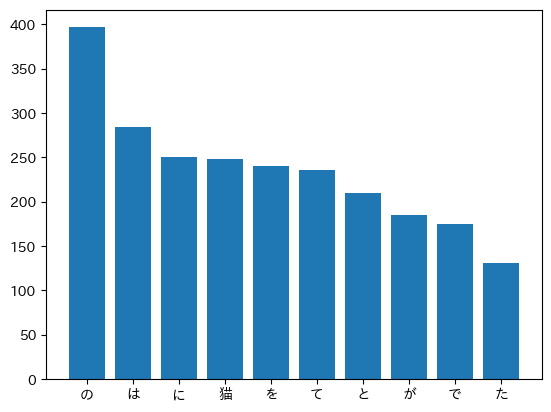

In [21]:
text_l_37 = []

for lis in result:
    if any(d["base"] == "猫" for d in lis):
      #any関数は一つでも条件を満たせば真の値を返す
        for dic in lis:
          if dic["pos"] != "記号":
            text_l_37.append(dic["surface"])

#count
c_37 = Counter(text_l_37)
word, count = zip(*c_37.most_common(10))

#plot
fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

#共起とは文書や文においてある文字列とある文字列が同時に出現すること


問３８

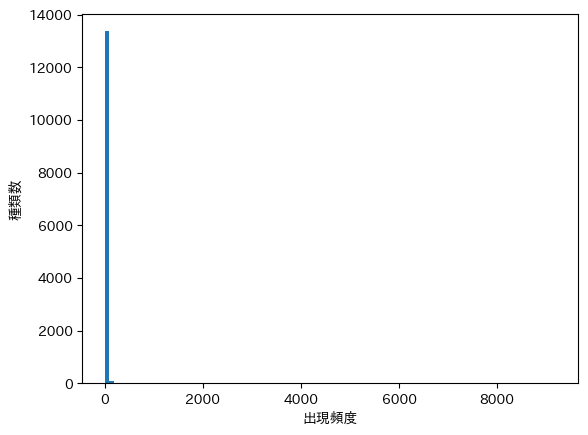

In [33]:
text_y=[]
for lis in result:
  for dic in lis:
    if dic["pos"] != "記号":   #表層形が記号の場合を除く
      text_y.append(dic["surface"])

c35 = Counter(text_y)
max = c35.most_common()[0][1]

#count
c38 = Counter(text_y)
word, count = zip(*c38.most_common())


#plot
fig, ax = plt.subplots()
ax.hist(count,range=(1,max),bins=100)  #range引数は軸の範囲を指定している。
#ヒスとグラムの表示
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

#線形目盛はグラフの軸が等間隔で一定の量の変化を表しているもの
#ヒストグラムは度数分布票をグラフにしたものでｘ軸が階級、ｙ軸が度数を表してる。


問３９

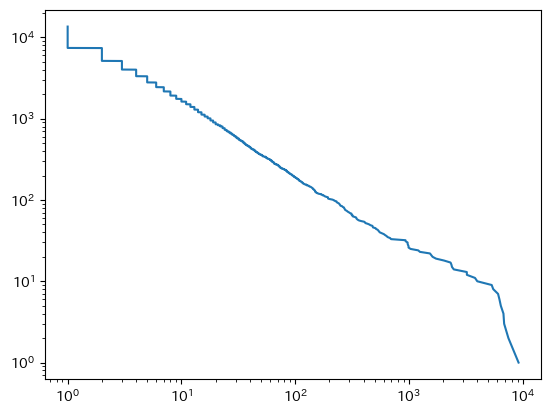

In [11]:
#count
c39 = Counter(text_l)
word, count = zip(*c39.most_common())

#plot
x = count
y = ([i + 1 for i, v in enumerate(count)])
 #enumerateは要素の前にインデックス番号を同時に格納するための関数
fig, ax = plt.subplots()
ax.plot(x, y)
plt.xscale("log") #引数にlogを指定することで軸を対数スケールに変換している。
plt.yscale("log")
plt.show()